# **Introduzione al Machine Learning -- laboratorio 15 e 16**

* Regressione lineare multipla



In [ ]:
!pip install ucimlrepo

from ucimlrepo import fetch_ucirepo

# fetch dataset
abalone = fetch_ucirepo(id=1)

# data (as pandas dataframes)
X = abalone.data.features
y = abalone.data.targets

In [ ]:
X

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
for sex in ['M', 'F', 'I']:
  X[sex] = pd.Series(X['Sex'] == sex, dtype=int)

In [ ]:
X.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,M,F,I
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,1,0,0
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,1,0,0
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,0,1,0
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,1,0,0
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0,0,1


In [ ]:
X = X.drop(columns='Sex')

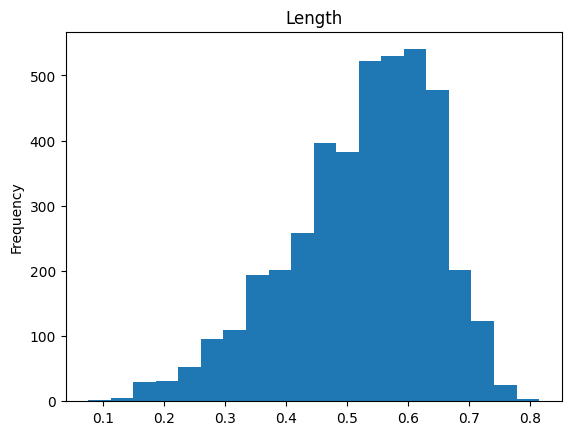

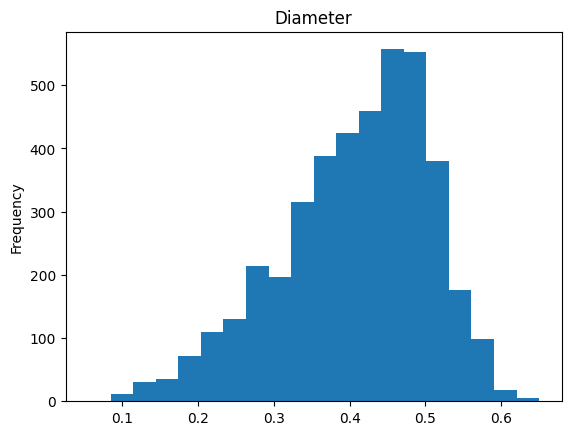

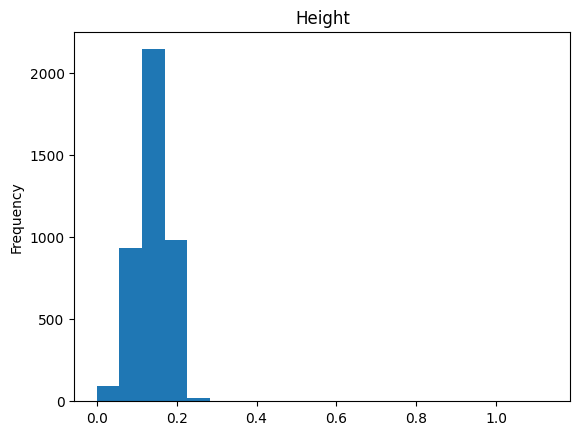

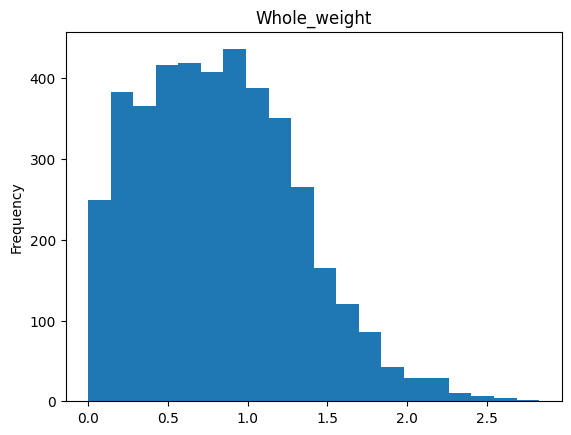

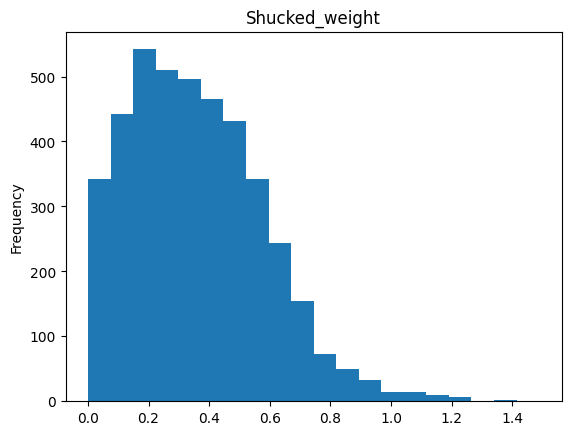

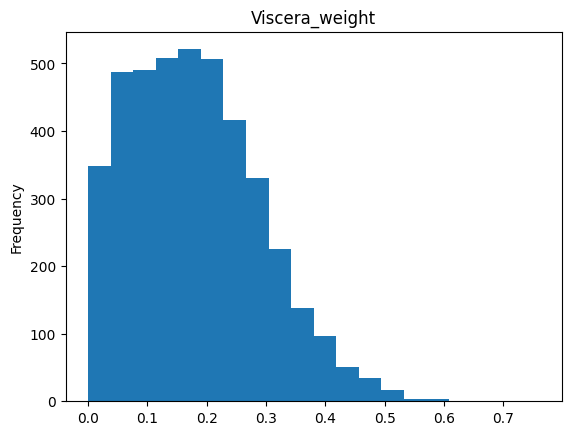

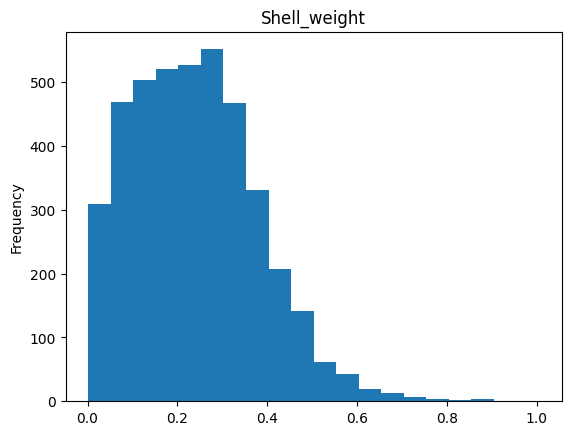

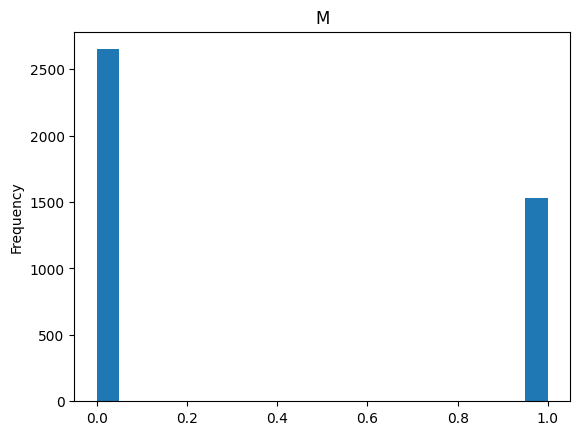

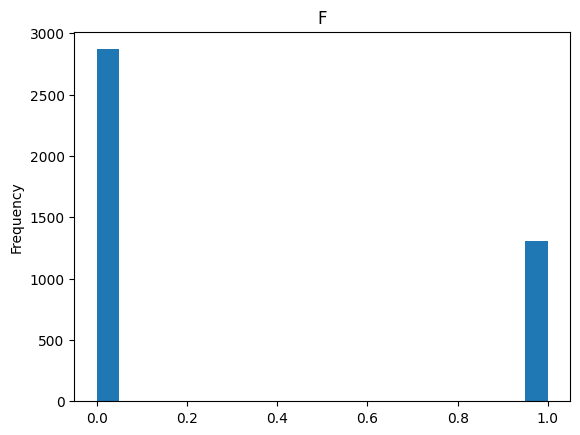

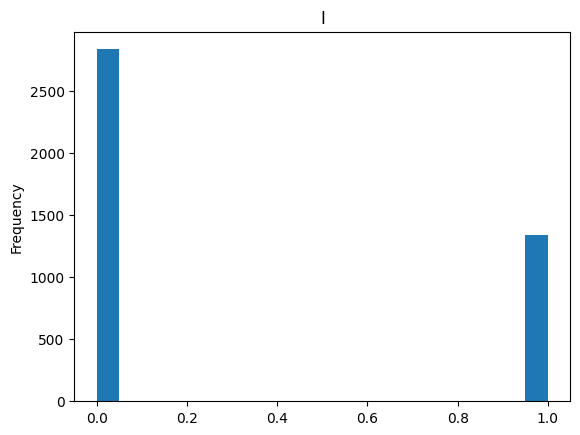

In [ ]:
for feat in X.columns:
  X[feat].plot(kind='hist', bins=20, title=feat)
  plt.show()

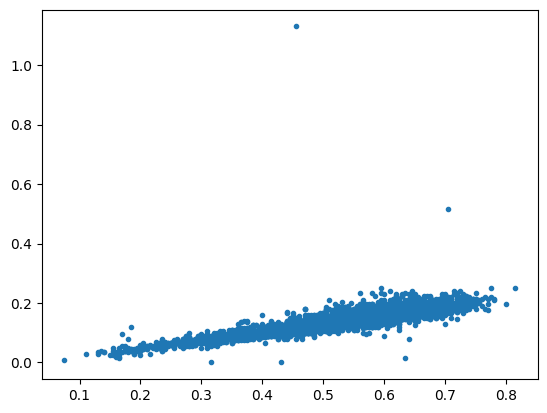

In [ ]:
# Cerco gli outlier

plt.plot(X['Length'], X['Height'], '.')
plt.show()

In [ ]:
outliers = X.nlargest(2, 'Height')
outliers

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,M,F,I
2051,0.455,0.355,1.130,0.594,0.3320,0.1160,0.1335,0,1,0
1417,0.705,0.565,0.515,2.210,1.1075,0.4865,0.5120,1,0,0


In [ ]:
X.loc[2049:2053]

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,M,F,I
2049,0.445,0.320,0.12,0.3780,0.1520,0.0825,0.1200,0,0,1
2050,0.450,0.350,0.13,0.4655,0.2075,0.1045,0.1350,1,0,0
2051,0.455,0.355,1.13,0.5940,0.3320,0.1160,0.1335,0,1,0
2052,0.460,0.345,0.12,0.4935,0.2435,0.1175,0.1320,1,0,0
2053,0.460,0.345,0.11,0.4595,0.2350,0.0885,0.1160,1,0,0


In [ ]:
X.loc[2051, 'Height'] = 0.13

In [ ]:
X.loc[1415:1419]

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,M,F,I
1415,0.695,0.565,0.190,1.7635,0.7465,0.3990,0.4975,0,1,0
1416,0.700,0.545,0.130,1.5560,0.6725,0.3740,0.1950,0,1,0
1417,0.705,0.565,0.515,2.2100,1.1075,0.4865,0.5120,1,0,0
1418,0.705,0.555,0.215,2.1410,1.0465,0.3830,0.5280,1,0,0
1419,0.705,0.570,0.180,1.5345,0.9600,0.4195,0.4300,0,1,0


In [ ]:
X.loc[1417, 'Height'] = 0.215

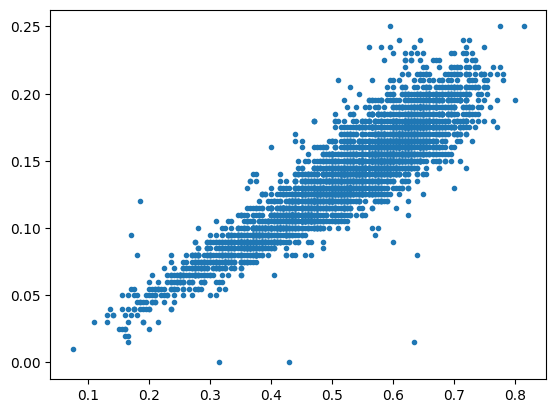

In [ ]:
plt.plot(X['Length'], X['Height'], '.')
plt.show()

In [ ]:
y = y['Rings']

In [ ]:
import statsmodels.api as sm

In [ ]:
model = sm.OLS(y, X)

In [ ]:
model = model.fit()

In [ ]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Rings   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     552.1
Date:                Wed, 17 Apr 2024   Prob (F-statistic):               0.00
Time:                        13:01:04   Log-Likelihood:                -9176.8
No. Observations:                4177   AIC:                         1.837e+04
Df Residuals:                    4167   BIC:                         1.844e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Length            -1.1666      1.800     -0.

In [ ]:
sm.add_constant(X).head()

,const,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,M,F,I
0,1.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,1,0,0
1,1.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,1,0,0
2,1.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,0,1,0
3,1.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,1,0,0
4,1.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0,0,1


In [ ]:
model = sm.OLS(y, sm.add_constant(X)).fit()

In [ ]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Rings   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     552.1
Date:                Wed, 17 Apr 2024   Prob (F-statistic):               0.00
Time:                        13:04:59   Log-Likelihood:                -9176.8
No. Observations:                4177   AIC:                         1.837e+04
Df Residuals:                    4167   BIC:                         1.844e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.4928      0.208     11.

In [ ]:
# Togliamo 'I'

model = sm.OLS(y, sm.add_constant(X.drop(columns='I'))).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Rings   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     552.1
Date:                Wed, 17 Apr 2024   Prob (F-statistic):               0.00
Time:                        13:13:03   Log-Likelihood:                -9176.8
No. Observations:                4177   AIC:                         1.837e+04
Df Residuals:                    4167   BIC:                         1.844e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.7791      0.268     10.

Ricominciamo dalla forward

In [ ]:
# Provo un modello con la prima variabile da sola

feat = 'Length'

model = sm.OLS(y, sm.add_constant(X[feat])).fit()

In [ ]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Rings   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     1875.
Date:                Wed, 17 Apr 2024   Prob (F-statistic):               0.00
Time:                        13:16:51   Log-Likelihood:                -10042.
No. Observations:                4177   AIC:                         2.009e+04
Df Residuals:                    4175   BIC:                         2.010e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1019      0.186     11.328      0.0

In [ ]:
# Errore standard di regressione

Se = np.sqrt(model.ssr / model.df_resid)
print(Se)

2.6786395489659487


In [ ]:
np.sqrt(model.mse_resid)

2.6786395489659487

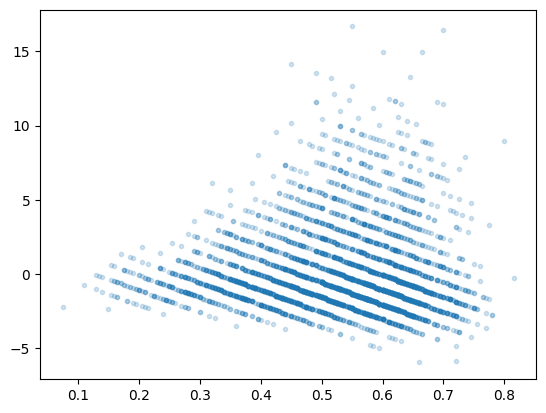

In [ ]:
plt.plot(X[feat], model.resid, '.', alpha=0.2)
plt.show()

Si nota una forte eteroschedasticità (forse). Inoltre i residui sono right-skewed (coda verso l'alto in questo grafico).

Length: 2.67864
Diameter: 2.63895
Height: 2.55672
Whole_weight: 2.71319
Shucked_weight: 2.92504
Viscera_weight: 2.7854
Shell_weight: 2.5105
M: 3.1708
F: 3.12193
I: 2.90183
Best feature: Shell_weight


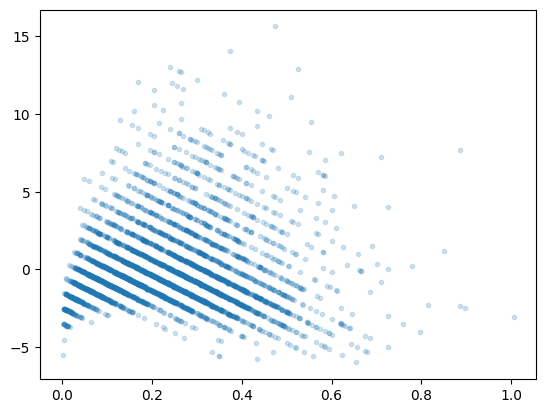

In [ ]:
best_se = 10
best_model = None
best_feat = None

for feat in X.columns:
  model = sm.OLS(y, sm.add_constant(X[feat])).fit()
  se = np.sqrt(model.mse_resid)
  print(f'{feat}: {se:g}')
  if se < best_se:
    best_se = se
    best_model = model
    best_feat = feat

print(f'Best feature: {best_feat}')
plt.plot(X[best_feat], best_model.resid, '.', alpha=0.2, label=best_feat)
plt.show()

Si vede una forte nonlinearità.

In [ ]:
X[best_feat+'_2'] = X[best_feat] ** 2
X.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,M,F,I,Shell_weight_2
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,1,0,0,0.022500
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,1,0,0,0.004900
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,0,1,0,0.044100
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,1,0,0,0.024025
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0,0,1,0.003025


Length: 2.51033
Diameter: 2.51032
Height: 2.48454
Whole_weight: 2.42633
Shucked_weight: 2.33909
Viscera_weight: 2.45937
M: 2.50825
F: 2.50309
I: 2.48522
Shell_weight_2: 2.48053
Best feature: Shucked_weight


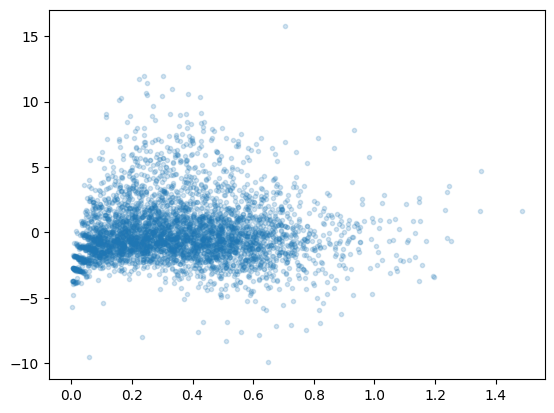

In [ ]:
feats_in = ['Shell_weight']
best_se = 10
best_model = None
best_feat = None

for feat in X.columns:
  if feat in feats_in:
    continue
  model = sm.OLS(y, sm.add_constant(X[feats_in + [feat]])).fit()
  se = np.sqrt(model.mse_resid)
  print(f'{feat}: {se:g}')
  if se < best_se:
    best_se = se
    best_model = model
    best_feat = feat

print(f'Best feature: {best_feat}')

plt.plot(X[best_feat], best_model.resid, '.', alpha=0.2, label=best_feat)
plt.show()

In [ ]:
X[best_feat+'_2'] = X[best_feat] ** 2
X['Shell_weight' + '_x_' + best_feat] = X['Shell_weight'] * X[best_feat]
X.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,M,F,I,Shell_weight_2,Shucked_weight_2,Shell_weight_x_Shucked_weight
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,1,0,0,0.022500,0.050400,0.033675
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,1,0,0,0.004900,0.009900,0.006965
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,0,1,0,0.044100,0.065792,0.053865
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,1,0,0,0.024025,0.046440,0.033403
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0,0,1,0.003025,0.008010,0.004922


In [ ]:
feats_in.append(best_feat)

In [ ]:
feats_in

['Shell_weight', 'Shucked_weight']

In [ ]:
def forward_step():
  best_se = 10
  best_model = None
  best_feat = None

  for feat in X.columns:
    if feat in feats_in:
      continue
    model = sm.OLS(y, sm.add_constant(X[feats_in + [feat]])).fit()
    se = np.sqrt(model.mse_resid)
    print(f'{feat}: {se:g}')
    if se < best_se:
      best_se = se
      best_model = model
      best_feat = feat

  print(f'Best feature: {best_feat}')

  for feat in [best_feat] + feats_in:
    plt.plot(X[feat], best_model.resid, '.', alpha=0.2, label=feat)
    plt.legend()
    plt.show()
  plt.plot(best_model.fittedvalues, best_model.resid, '.', alpha=0.2, label='predicted')
  plt.legend()
  plt.show()

  return best_feat

Length: 2.28872
Diameter: 2.27531
Height: 2.26128
Whole_weight: 2.29783
Viscera_weight: 2.33558
M: 2.33062
F: 2.33215
I: 2.29559
Shell_weight_2: 2.25227
Shucked_weight_2: 2.31976
Shell_weight_x_Shucked_weight: 2.27514
Best feature: Shell_weight_2


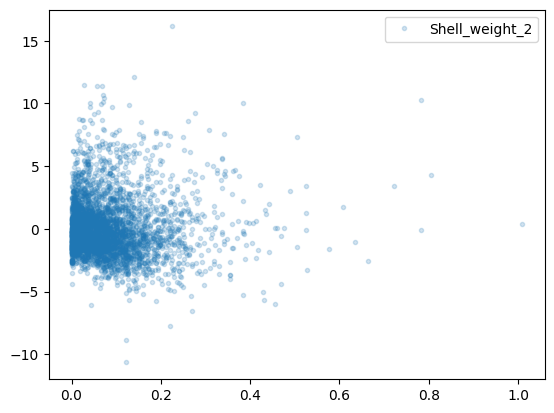

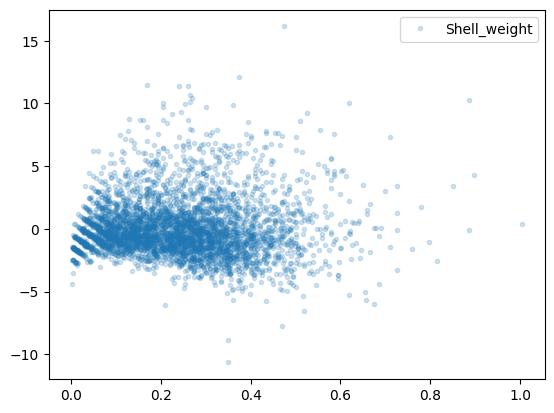

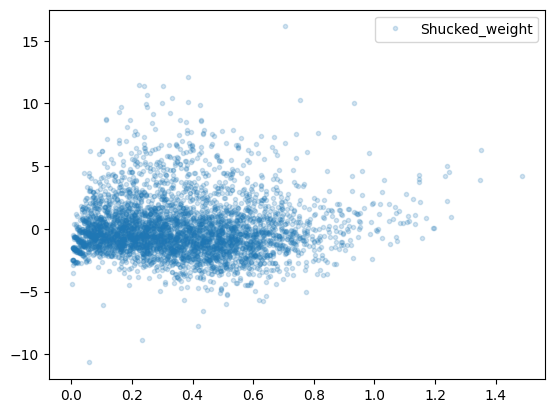

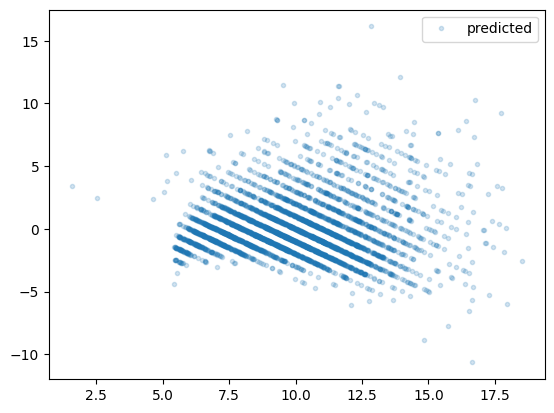

In [ ]:
best_feat = forward_step()

Proviamo in alternativa a fare delle trasformazioni nonlineari.

In [ ]:
# data (as pandas dataframes)
X = abalone.data.features
y = abalone.data.targets
for sex in ['M', 'F', 'I']:
  X[sex] = pd.Series(X['Sex'] == sex, dtype=int)
X = X.drop(columns='Sex')
X.loc[2051, 'Height'] = 0.13
X.loc[1417, 'Height'] = 0.215
y = y['Rings']


X = np.sqrt(X)
y = np.sqrt(y)

In [ ]:
feats_in = []

Length: 0.389121
Diameter: 0.38279
Height: 0.373816
Whole_weight: 0.387883
Shucked_weight: 0.421254
Viscera_weight: 0.397739
Shell_weight: 0.359254
M: 0.485414
F: 0.477506
I: 0.437749
Best feature: Shell_weight


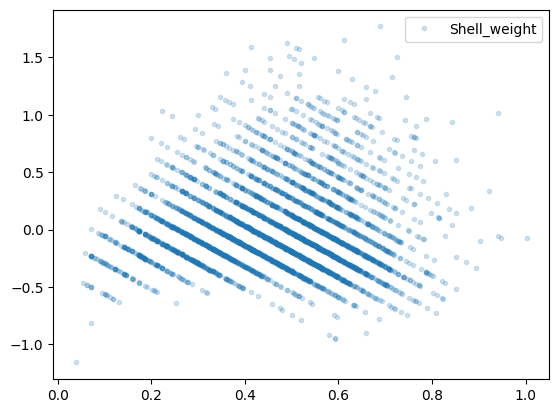

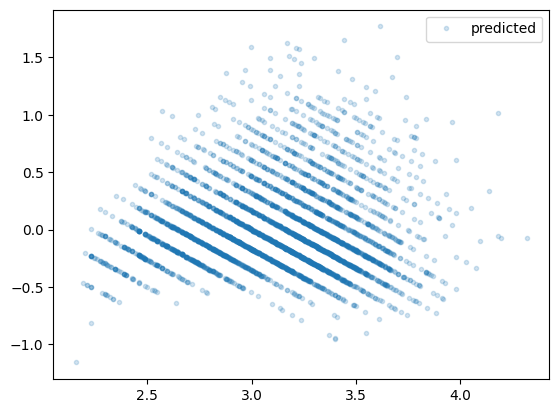

In [ ]:
best_feat = forward_step()

In [ ]:
feats_in.append(best_feat)

Length: 0.356639
Diameter: 0.358281
Height: 0.357761
Whole_weight: 0.345438
Shucked_weight: 0.330058
Viscera_weight: 0.351238
M: 0.359044
F: 0.358591
I: 0.356782
Shell_weight_2: 0.356612
Best feature: Shucked_weight


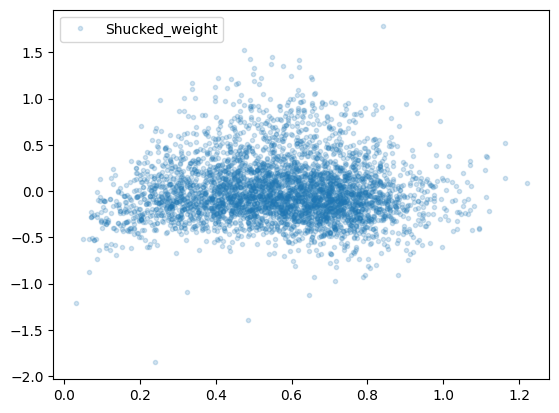

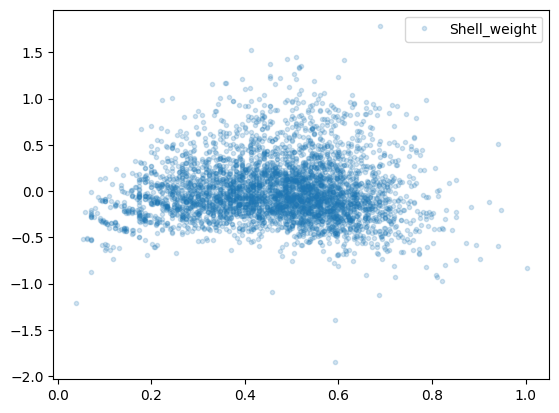

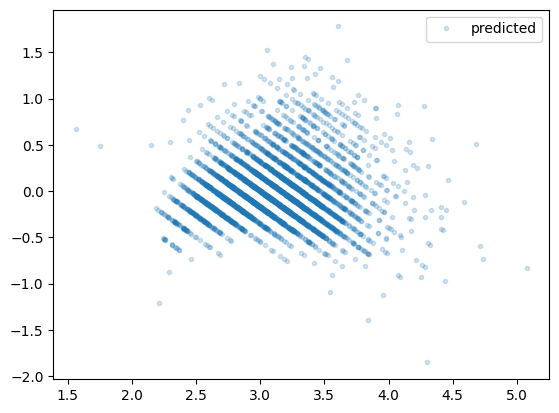

In [ ]:
X[best_feat+'_2'] = X[best_feat] ** 2
best_feat = forward_step()

In [ ]:
feats_in.append(best_feat)

Length: 0.327234
Diameter: 0.325725
Height: 0.323917
Whole_weight: 0.323553
Viscera_weight: 0.329525
M: 0.329251
F: 0.32957
I: 0.326229
Shell_weight_2: 0.322922
Shucked_weight_2: 0.325743
Shell_weight_x_Shucked_weight: 0.323282
Best feature: Shell_weight_2


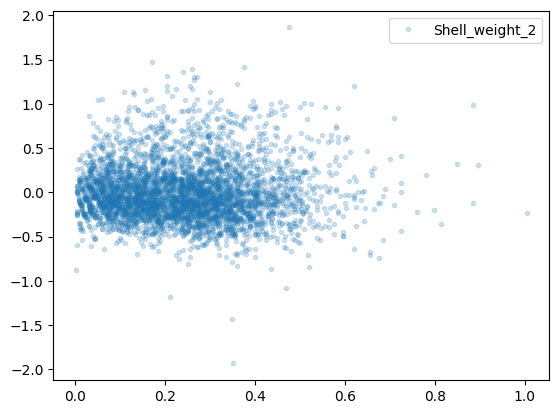

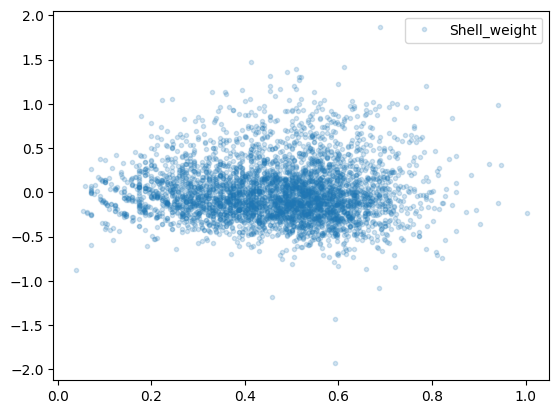

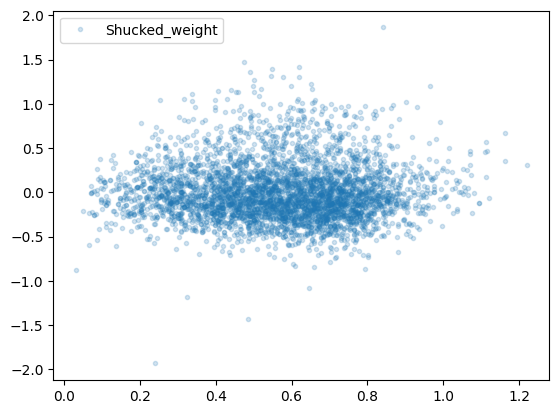

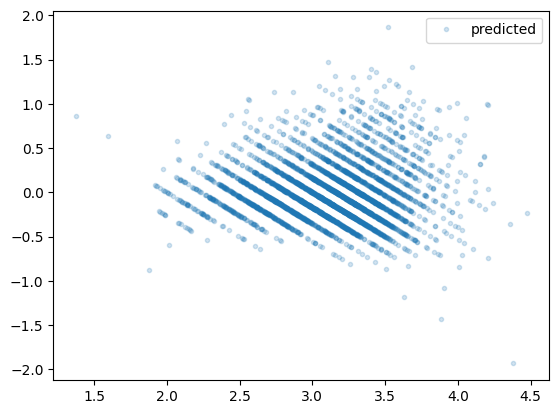

In [ ]:
X[best_feat+'_2'] = X[best_feat] ** 2
X['Shell_weight' + '_x_' + best_feat] = X['Shell_weight'] * X[best_feat]
best_feat = forward_step()

In [ ]:
feats_in.append(best_feat)

Length: 0.322904
Diameter: 0.322868
Height: 0.3201
Whole_weight: 0.316335
Viscera_weight: 0.322671
M: 0.322235
F: 0.322598
I: 0.319916
Shucked_weight_2: 0.322802
Shell_weight_x_Shucked_weight: 0.322914
Shell_weight_3: 0.322661
Best feature: Whole_weight


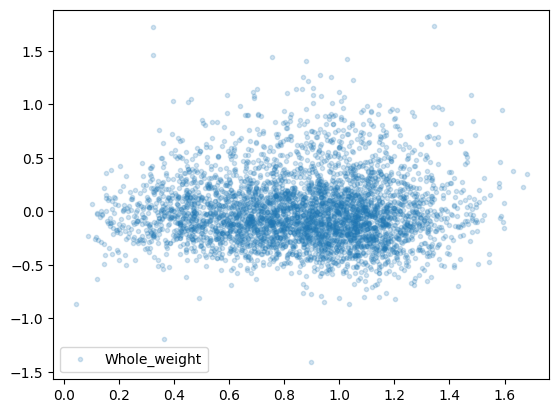

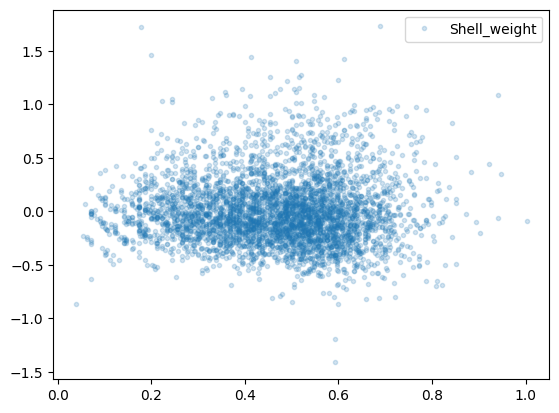

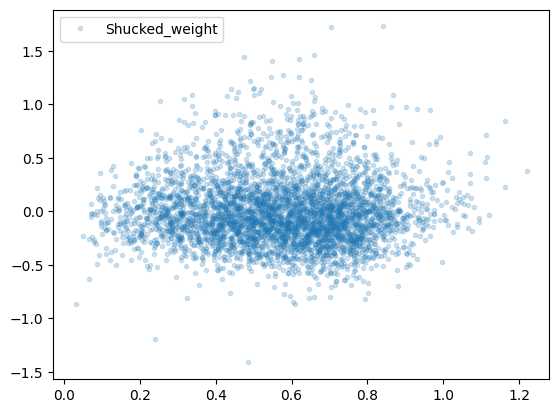

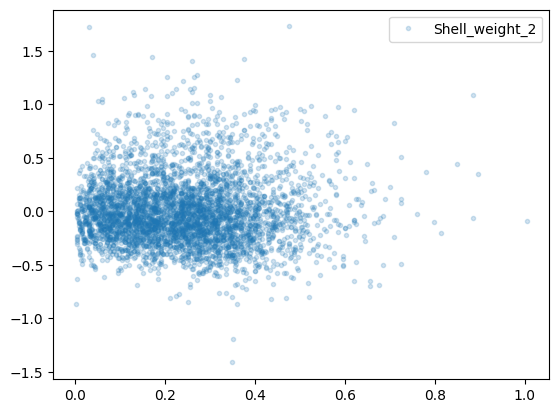

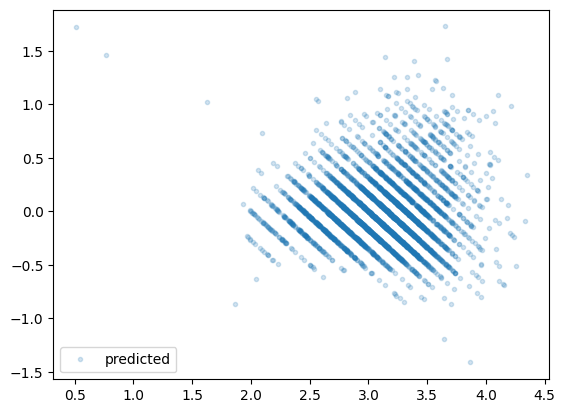

In [ ]:
X['Shell_weight_3'] = X['Shell_weight'] ** 3
best_feat = forward_step()

In [ ]:
feats_in.append(best_feat)

In [ ]:
feats_in

['Shell_weight', 'Shucked_weight', 'Shell_weight_2', 'Whole_weight']

Length: 0.315716
Diameter: 0.316333
Height: 0.314838
Viscera_weight: 0.314487
M: 0.315775
F: 0.316249
I: 0.314489
Shucked_weight_2: 0.316298
Shell_weight_x_Shucked_weight: 0.316118
Shell_weight_3: 0.315761
Whole_weight_2: 0.316367
Shell_weight_x_Whole_weight: 0.316342
Shucked_weight_x_Whole_weight: 0.316341
Best feature: Viscera_weight


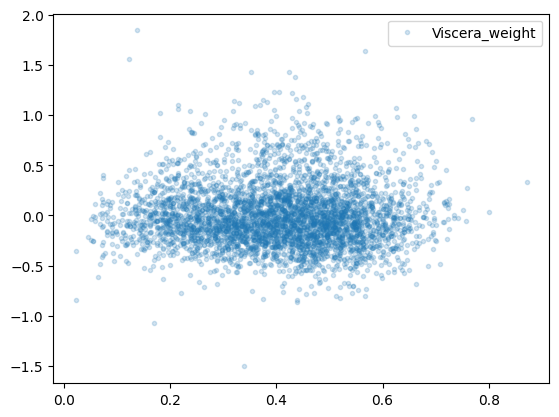

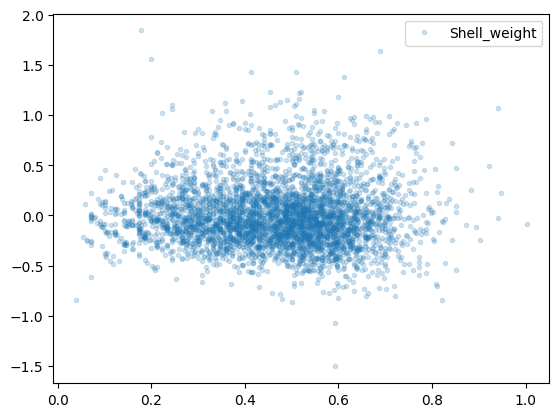

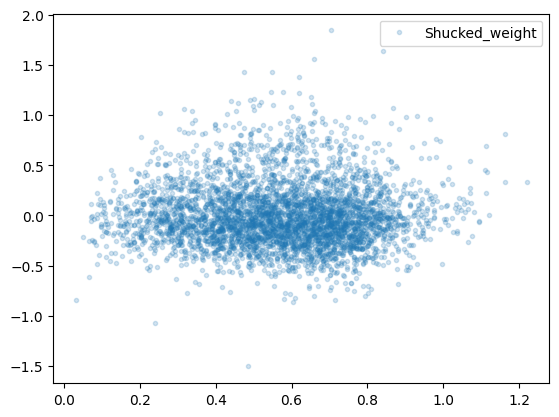

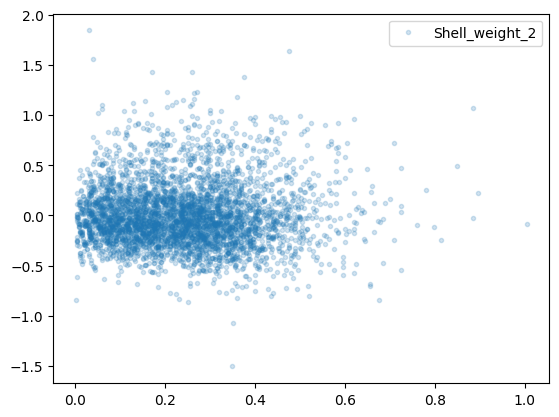

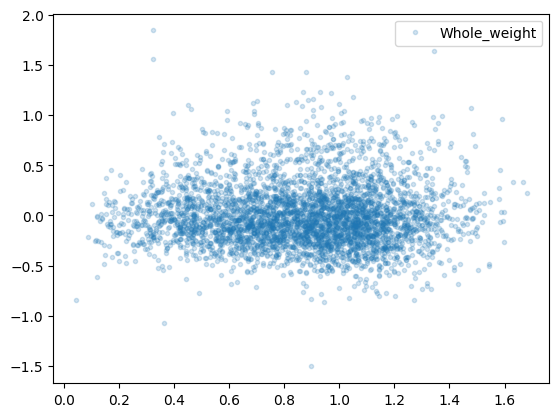

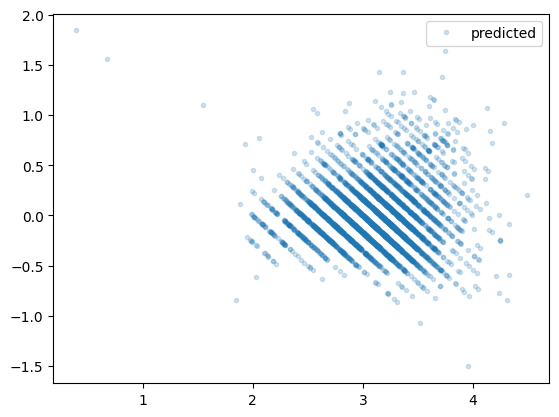

In [ ]:
X[best_feat+'_2'] = X[best_feat] ** 2
X['Shell_weight' + '_x_' + best_feat] = X['Shell_weight'] * X[best_feat]
X['Shucked_weight' + '_x_' + best_feat] = X['Shucked_weight'] * X[best_feat]
best_feat = forward_step()

HW: Da qui per continuare, sarebbero da controllare i due-quattro punti più lontani, per verificare che non siano outliers e caso mai toglierli.  Si potrebbe anche cercare un modello con trasformazioni diverse.

In [ ]:
model = sm.OLS(y, sm.add_constant(X[feats_in])).fit()

In [ ]:
under = model.fittedvalues.nsmallest(4)

In [ ]:
X.loc[under.index] ** 2

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,M,F,I,Shell_weight_2,Shucked_weight_2,Shell_weight_x_Shucked_weight,Shell_weight_3,Whole_weight_2,Shell_weight_x_Whole_weight,Shucked_weight_x_Whole_weight
2627,0.275,0.205,0.070,0.1055,0.4950,0.0190,0.0315,0.0,0.0,1.0,0.000992,2.450250e-01,0.015593,3.125587e-05,0.011130,0.003323,0.052223
1216,0.310,0.225,0.070,0.1055,0.4350,0.0150,0.0400,0.0,0.0,1.0,0.001600,1.892250e-01,0.017400,6.400000e-05,0.011130,0.004220,0.045893
3086,0.355,0.270,0.075,0.2040,0.3045,0.0460,0.0595,0.0,0.0,1.0,0.003540,9.272025e-02,0.018118,2.106449e-04,0.041616,0.012138,0.062118
236,0.075,0.055,0.010,0.0020,0.0010,0.0005,0.0015,0.0,0.0,1.0,0.000002,1.000000e-06,0.000001,3.375000e-09,0.000004,0.000003,0.000002


In [ ]:
y.loc[under.index] ** 2

2627    5.0
1216    5.0
3086    7.0
236     1.0
Name: Rings, dtype: float64

In [ ]:
X.loc[2625:2629]**2

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,M,F,I,Shell_weight_2,Shucked_weight_2,Shell_weight_x_Shucked_weight,Shell_weight_3,Whole_weight_2,Shell_weight_x_Whole_weight,Shucked_weight_x_Whole_weight
2625,0.770,0.600,0.215,2.1945,1.0515,0.482,0.5840,1.0,0.0,0.0,0.341056,1.105652,0.614076,0.199177,4.815830,1.281588,2.307517
2626,0.220,0.160,0.050,0.0490,0.0215,0.010,0.0150,0.0,0.0,1.0,0.000225,0.000462,0.000322,0.000003,0.002401,0.000735,0.001053
2627,0.275,0.205,0.070,0.1055,0.4950,0.019,0.0315,0.0,0.0,1.0,0.000992,0.245025,0.015593,0.000031,0.011130,0.003323,0.052223
2628,0.290,0.210,0.060,0.1045,0.0415,0.022,0.0350,0.0,0.0,1.0,0.001225,0.001722,0.001453,0.000043,0.010920,0.003658,0.004337
2629,0.330,0.240,0.075,0.1630,0.0745,0.033,0.0480,0.0,0.0,1.0,0.002304,0.005550,0.003576,0.000111,0.026569,0.007824,0.012143


In [ ]:
model = sm.OLS(y, sm.add_constant(X)).fit()

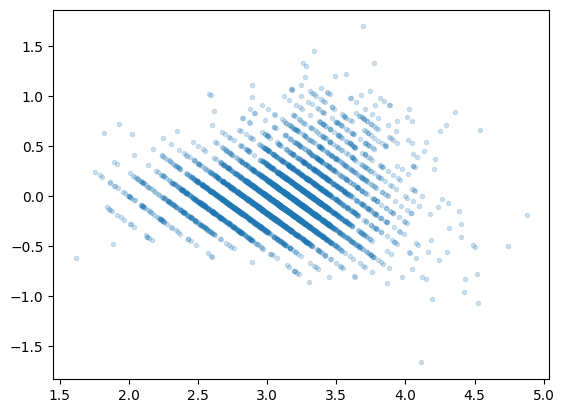

In [ ]:
plt.plot(model.fittedvalues, model.resid, '.', alpha=0.2)

In [ ]:
np.sqrt(model.mse_resid)

0.3044383545881587

In [ ]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Rings   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     430.5
Date:                Wed, 17 Apr 2024   Prob (F-statistic):               0.00
Time:                        14:22:19   Log-Likelihood:                -950.74
No. Observations:                4177   AIC:                             1935.
Df Residuals:                    4160   BIC:                             2043.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [ ]:
# data (as pandas dataframes)
X = abalone.data.features
y = abalone.data.targets
for sex in ['M', 'F', 'I']:
  X[sex] = pd.Series(X['Sex'] == sex, dtype=int)
X = X.drop(columns='Sex')
X.loc[2051, 'Height'] = 0.13
X.loc[1417, 'Height'] = 0.215
y = y['Rings']

X = np.sqrt(X)
y = np.sqrt(y)



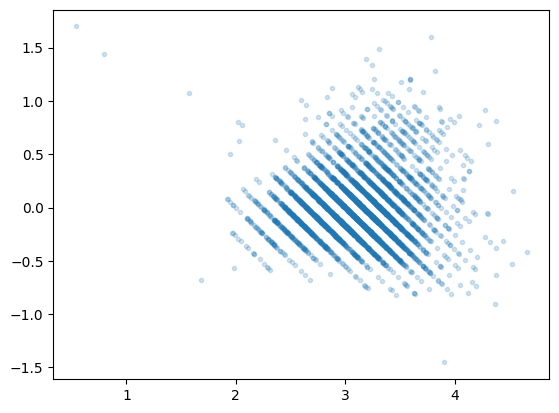

0.3132146669809831
                            OLS Regression Results                            
Dep. Variable:                  Rings   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     696.7
Date:                Wed, 17 Apr 2024   Prob (F-statistic):               0.00
Time:                        14:25:25   Log-Likelihood:                -1073.0
No. Observations:                4177   AIC:                             2166.
Df Residuals:                    4167   BIC:                             2229.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.0830

In [ ]:
model = sm.OLS(y, sm.add_constant(X.drop(columns='I'))).fit()
plt.plot(model.fittedvalues, model.resid, '.', alpha=0.2)
plt.show()
print(np.sqrt(model.mse_resid))
print(model.summary())

In [ ]:
feats = ['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight']
for feat in feats:
  X[feat + '_2'] = X[feat] ** 2

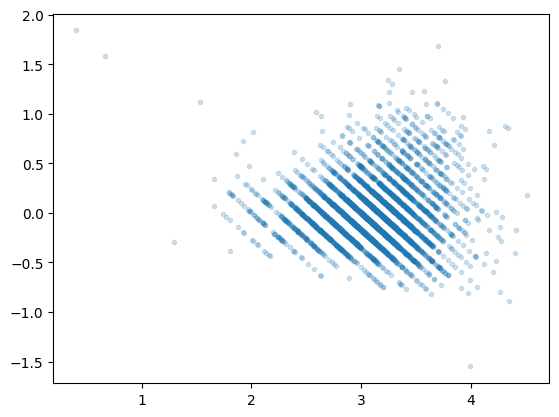

0.30899911766359445
                            OLS Regression Results                            
Dep. Variable:                  Rings   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     410.2
Date:                Wed, 17 Apr 2024   Prob (F-statistic):               0.00
Time:                        14:27:59   Log-Likelihood:                -1012.8
No. Observations:                4177   AIC:                             2060.
Df Residuals:                    4160   BIC:                             2167.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               

In [ ]:
model = sm.OLS(y, sm.add_constant(X.drop(columns='I'))).fit()
plt.plot(model.fittedvalues, model.resid, '.', alpha=0.2)
plt.show()
print(np.sqrt(model.mse_resid))
print(model.summary())

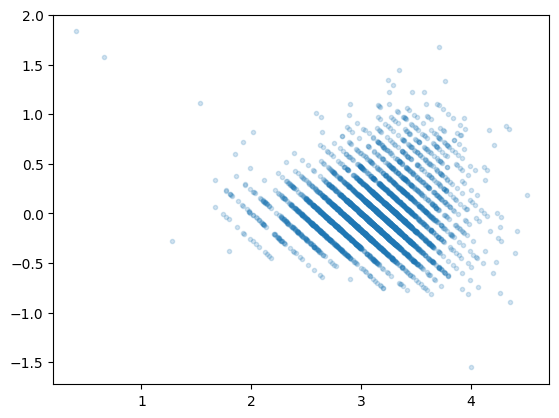

0.3089909851597952
                            OLS Regression Results                            
Dep. Variable:                  Rings   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     437.6
Date:                Wed, 17 Apr 2024   Prob (F-statistic):               0.00
Time:                        14:31:08   Log-Likelihood:                -1013.2
No. Observations:                4177   AIC:                             2058.
Df Residuals:                    4161   BIC:                             2160.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -

In [ ]:
X = X.drop(columns='Height_2')

model = sm.OLS(y, sm.add_constant(X.drop(columns='I'))).fit()
plt.plot(model.fittedvalues, model.resid, '.', alpha=0.2)
plt.show()
print(np.sqrt(model.mse_resid))
print(model.summary())

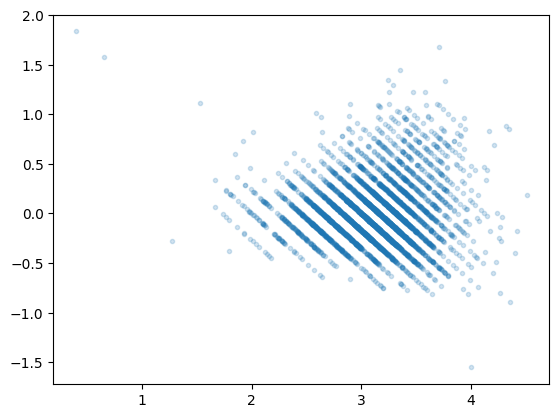

0.30895391928945626
                            OLS Regression Results                            
Dep. Variable:                  Rings   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     468.9
Date:                Wed, 17 Apr 2024   Prob (F-statistic):               0.00
Time:                        14:31:56   Log-Likelihood:                -1013.2
No. Observations:                4177   AIC:                             2056.
Df Residuals:                    4162   BIC:                             2152.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               

In [ ]:
X = X.drop(columns='Whole_weight_2')

model = sm.OLS(y, sm.add_constant(X.drop(columns='I'))).fit()
plt.plot(model.fittedvalues, model.resid, '.', alpha=0.2)
plt.show()
print(np.sqrt(model.mse_resid))
print(model.summary())

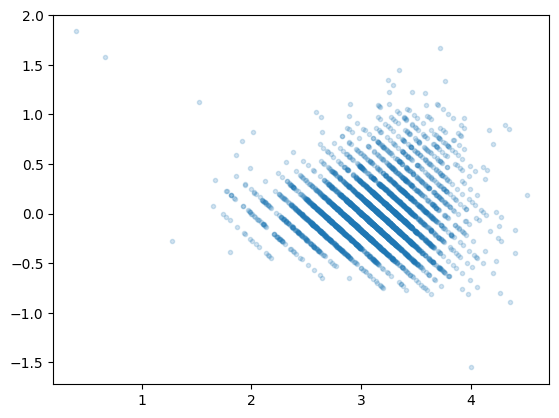

0.3089312755852078
                            OLS Regression Results                            
Dep. Variable:                  Rings   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     505.1
Date:                Wed, 17 Apr 2024   Prob (F-statistic):               0.00
Time:                        14:32:30   Log-Likelihood:                -1013.4
No. Observations:                4177   AIC:                             2055.
Df Residuals:                    4163   BIC:                             2144.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -

In [ ]:
X = X.drop(columns='Diameter_2')

model = sm.OLS(y, sm.add_constant(X.drop(columns='I'))).fit()
plt.plot(model.fittedvalues, model.resid, '.', alpha=0.2)
plt.show()
print(np.sqrt(model.mse_resid))
print(model.summary())

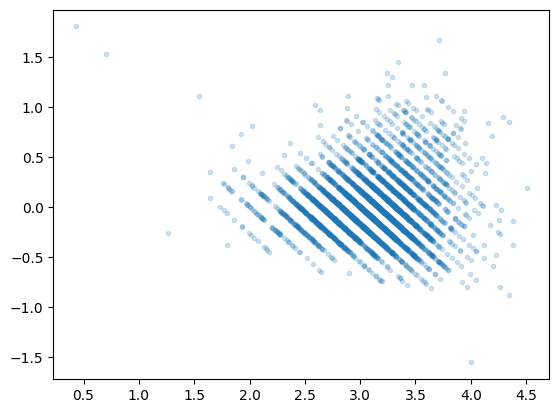

0.30893342686027264
                            OLS Regression Results                            
Dep. Variable:                  Rings   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     547.0
Date:                Wed, 17 Apr 2024   Prob (F-statistic):               0.00
Time:                        14:33:07   Log-Likelihood:                -1014.0
No. Observations:                4177   AIC:                             2054.
Df Residuals:                    4164   BIC:                             2136.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               

In [ ]:
X = X.drop(columns='Viscera_weight_2')

model = sm.OLS(y, sm.add_constant(X.drop(columns='I'))).fit()
plt.plot(model.fittedvalues, model.resid, '.', alpha=0.2)
plt.show()
print(np.sqrt(model.mse_resid))
print(model.summary())